# 1. Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
df = pd.read_csv("datasets/car_data.csv")

# 2. Изучение данных

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

## Описание признаков

| Признак | Тип | Описание |
|---------|-----|----------|
| Car_Name | Категориальный | Название модели автомобиля |
| Year | Числовой | Год выпуска |
| Selling_Price | Числовой | Цена продажи |
| Present_Price | Числовой | Текущая рыночная цена |
| Driven_kms | Числовой | Пробег в км |
| Fuel_Type | Категориальный | Тип топлива (Petrol/Diesel/CNG) |
| Selling_type | Категориальный | Тип продавца (Dealer/Individual) |
| Transmission | Категориальный | Тип коробки передач |
| Owner | Порядковый | Количество предыдущих владельцев |


# 3. Очистка данных

In [8]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
print(f"Дубликатов: {df.duplicated().sum()}")

Дубликатов: 2


In [10]:
df = df.drop_duplicates()

In [11]:
print("Fuel_Type:", df['Fuel_Type'].unique())
print("Selling_type:", df['Selling_type'].unique())
print("Transmission:", df['Transmission'].unique())

Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Selling_type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [12]:
str_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
for col in str_cols:
    df[col] = df[col].str.lower().str.strip()

In [13]:
df['Fuel_Type'].value_counts()

Fuel_Type
petrol    239
diesel     58
cng         2
Name: count, dtype: int64

In [14]:
print("Отрицательные цены продажи:", (df['Selling_Price'] < 0).sum())
print("Отрицательный пробег:", (df['Driven_kms'] < 0).sum())
print("Год больше текущего:", (df['Year'] > 2025).sum())

Отрицательные цены продажи: 0
Отрицательный пробег: 0
Год больше текущего: 0


In [ ]:
# Как можно "удалить" выбросы df['Selling_Price'] = df['Selling_Price'] < 15

In [15]:
print(f"Диапазон годов: {df['Year'].min()} - {df['Year'].max()}")

Диапазон годов: 2003 - 2018


# 4. Визуализация данных

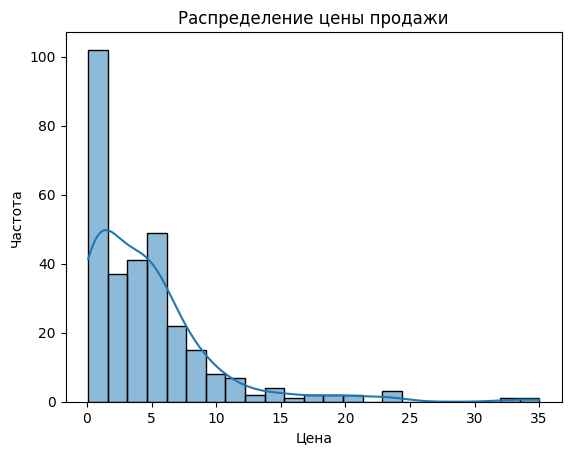

In [16]:
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Распределение цены продажи')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

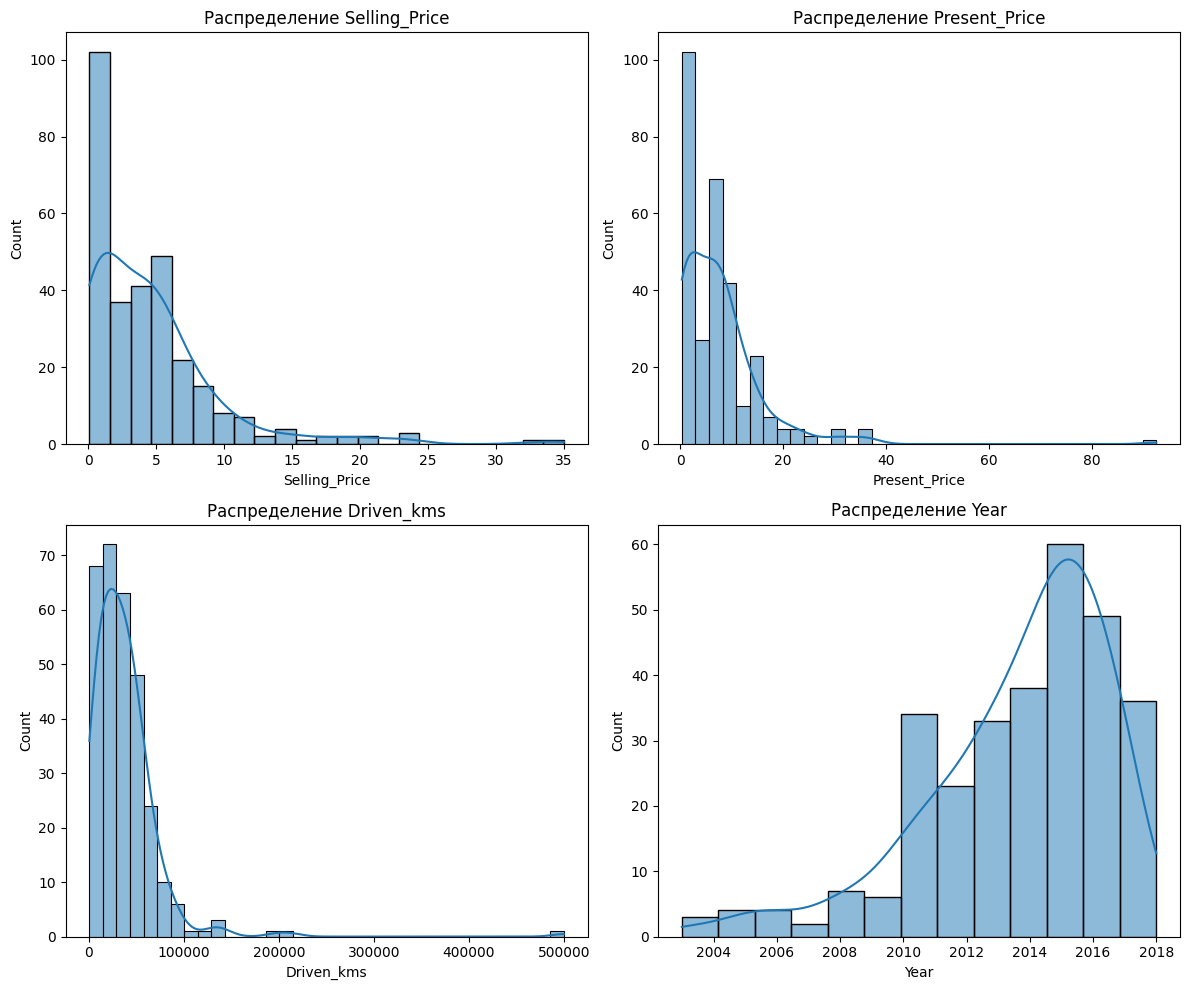

In [17]:
numeric_cols = ['Selling_Price', 'Present_Price', 'Driven_kms', 'Year']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Распределение {col}')

plt.tight_layout()
plt.show()

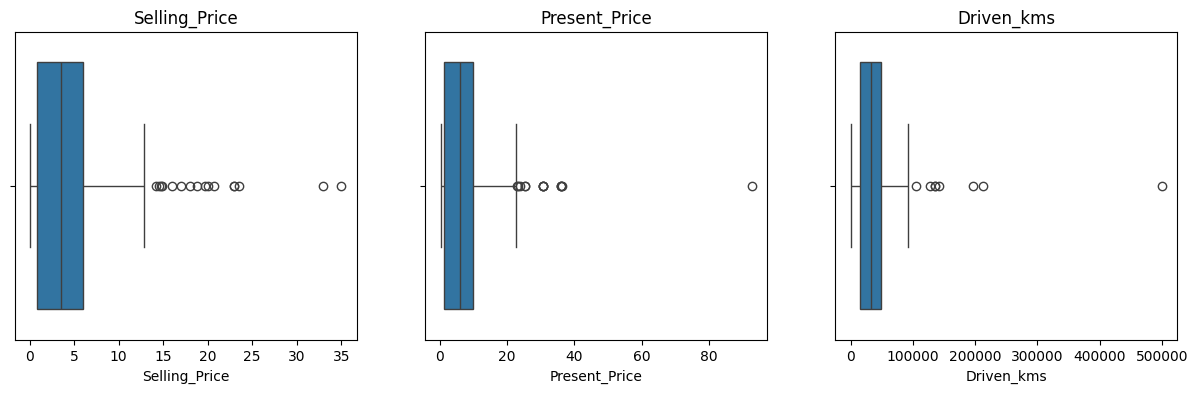

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(x=df['Selling_Price'], ax=axes[0])
axes[0].set_title('Selling_Price')

sns.boxplot(x=df['Present_Price'], ax=axes[1])
axes[1].set_title('Present_Price')

sns.boxplot(x=df['Driven_kms'], ax=axes[2])
axes[2].set_title('Driven_kms')

plt.show()

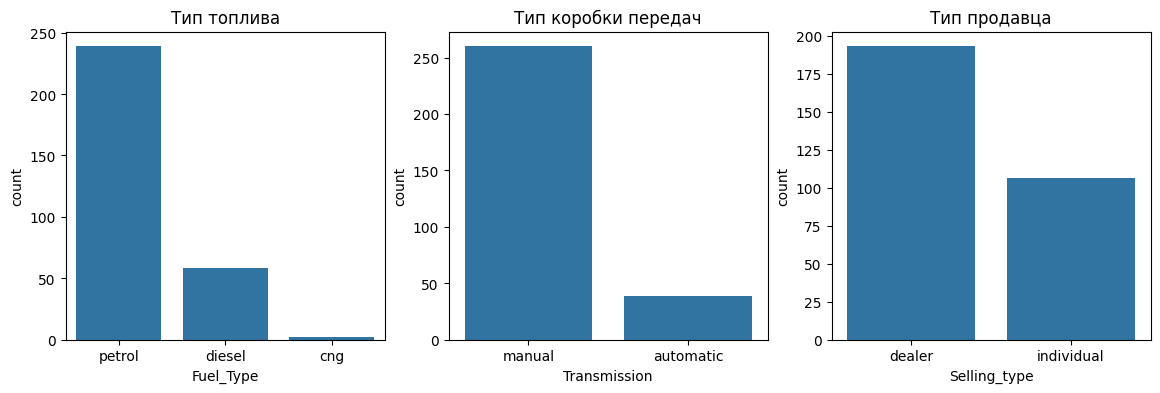

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(data=df, x='Fuel_Type', ax=axes[0])
axes[0].set_title('Тип топлива')

sns.countplot(data=df, x='Transmission', ax=axes[1])
axes[1].set_title('Тип коробки передач')

sns.countplot(data=df, x='Selling_type', ax=axes[2])
axes[2].set_title('Тип продавца')

plt.show()

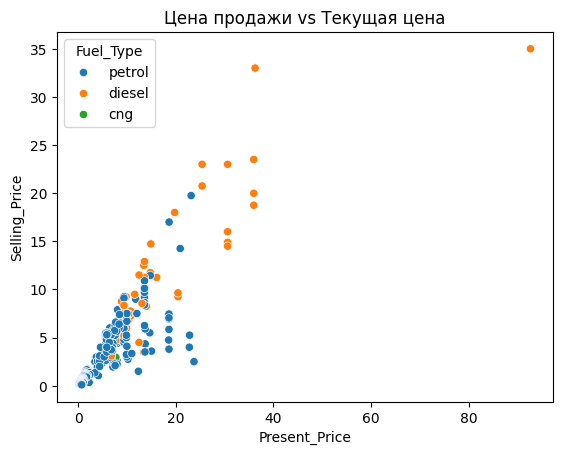

In [20]:
sns.scatterplot(data=df, x='Present_Price', y='Selling_Price', hue='Fuel_Type')
plt.title('Цена продажи vs Текущая цена')
plt.show()

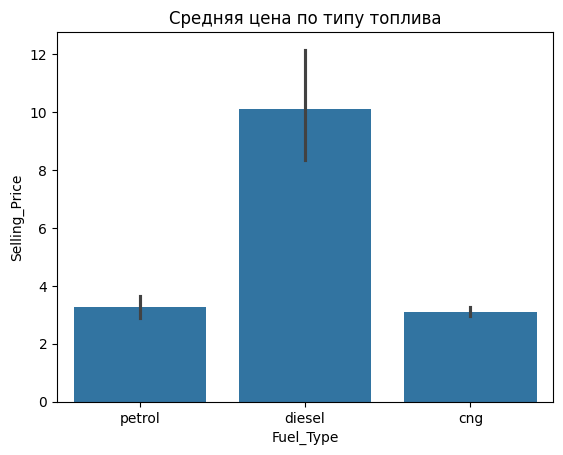

In [21]:
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.title('Средняя цена по типу топлива')
plt.show()

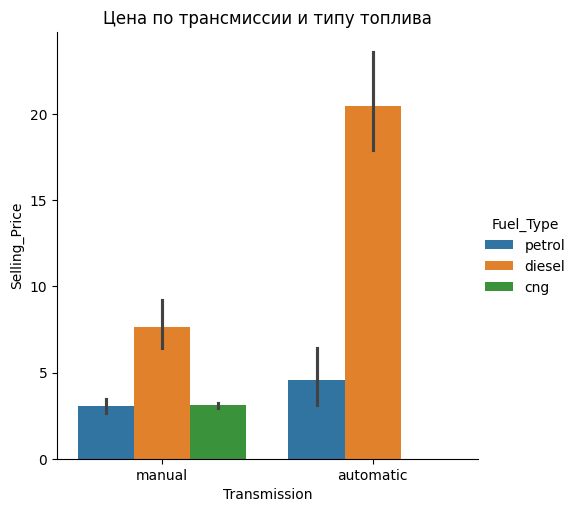

In [22]:
sns.catplot(data=df, x='Transmission', y='Selling_Price', hue='Fuel_Type', kind='bar')
plt.title('Цена по трансмиссии и типу топлива')
plt.show()

In [23]:
print(f"Среднее (mean): {df['Selling_Price'].mean():.2f}")
print(f"Медиана (median): {df['Selling_Price'].median():.2f}")
print(f"Мода (mode): {df['Selling_Price'].mode()[0]:.2f}")

Среднее (mean): 4.59
Медиана (median): 3.51
Мода (mode): 0.45


# 5. Статистический анализ

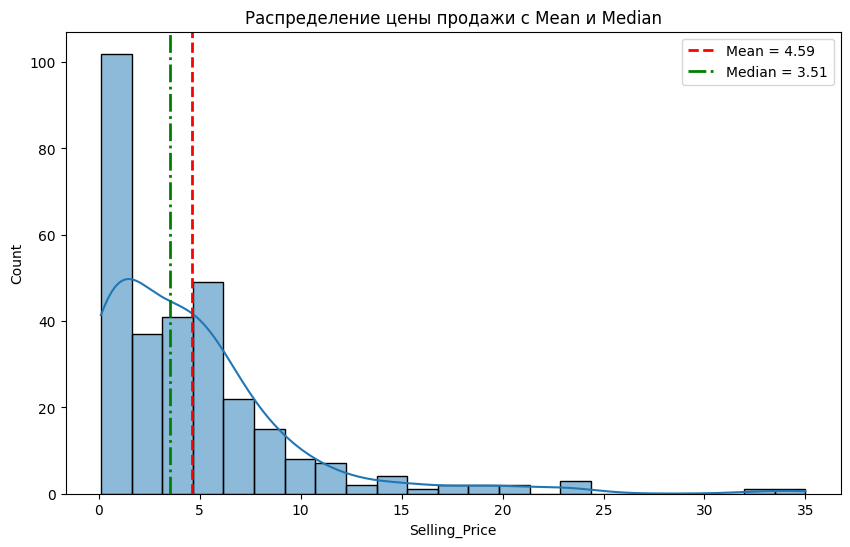

In [24]:
mu = df['Selling_Price'].mean()
med = df['Selling_Price'].median()

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, ax=ax)
ax.axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Mean = {mu:.2f}')
ax.axvline(med, color='green', linestyle='-.', linewidth=2, label=f'Median = {med:.2f}')
ax.set_title('Распределение цены продажи с Mean и Median')
ax.legend()
plt.show()

In [25]:
print(f"Размах (Range): {df['Selling_Price'].max() - df['Selling_Price'].min():.2f}")
print(f"Дисперсия (Variance): {df['Selling_Price'].var():.2f}")
print(f"Стд. отклонение (Std): {df['Selling_Price'].std():.2f}")

Размах (Range): 34.90
Дисперсия (Variance): 24.84
Стд. отклонение (Std): 4.98


In [26]:
Q1 = df['Selling_Price'].quantile(0.25)
Q2 = df['Selling_Price'].quantile(0.50) 
Q3 = df['Selling_Price'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q2 (50%, медиана): {Q2:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

Q1 (25%): 0.85
Q2 (50%, медиана): 3.51
Q3 (75%): 6.00
IQR: 5.15


In [27]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

outliers = df[(df['Selling_Price'] < lower_bound) | (df['Selling_Price'] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")

Нижняя граница: -6.88
Верхняя граница: 13.73

Количество выбросов: 16


In [28]:
outliers.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
50,fortuner,2012,14.90,30.61,104707,diesel,dealer,automatic,0
51,fortuner,2015,23.00,30.61,40000,diesel,dealer,automatic,0
52,innova,2017,18.00,19.77,15000,diesel,dealer,automatic,0
53,fortuner,2013,16.00,30.61,135000,diesel,individual,automatic,0
59,fortuner,2014,19.99,35.96,41000,diesel,dealer,automatic,0
62,fortuner,2014,18.75,35.96,78000,diesel,dealer,automatic,0
63,fortuner,2015,23.50,35.96,47000,diesel,dealer,automatic,0
64,fortuner,2017,33.00,36.23,6000,diesel,dealer,automatic,0
66,innova,2017,19.75,23.15,11000,petrol,dealer,automatic,0
69,corolla altis,2016,14.25,20.91,12000,petrol,dealer,manual,0


In [29]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


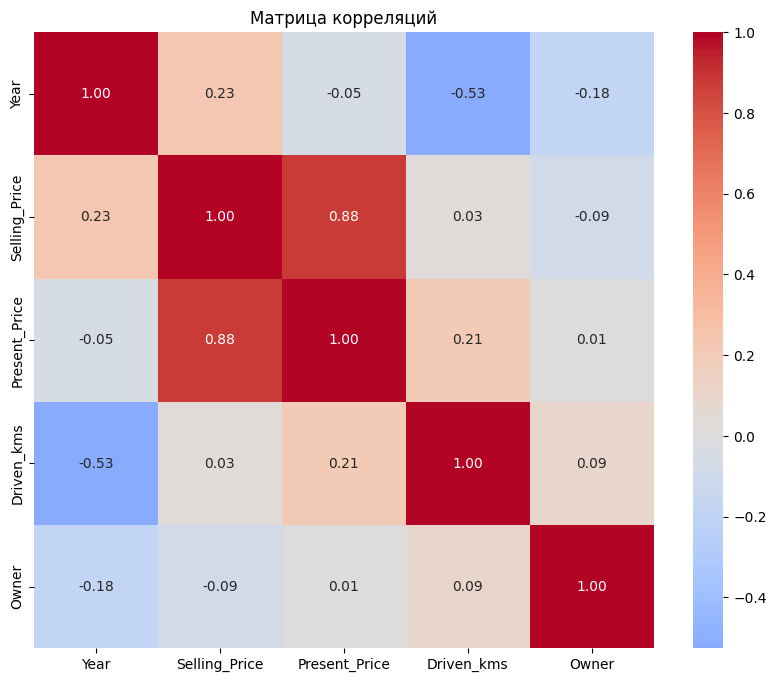

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций')
plt.show()

In [31]:
current_year = 2025
df['Car_Age'] = current_year - df['Year']
df[['Car_Name', 'Year', 'Car_Age']].head()

,Car_Name,Year,Car_Age
0,ritz,2014,11
1,sx4,2013,12
2,ciaz,2017,8
3,wagon r,2011,14
4,swift,2014,11


# 6. Feature Engineering

In [32]:
df['Km_per_Year'] = df['Driven_kms'] / df['Car_Age'].replace(0, 1) 
df[['Car_Name', 'Driven_kms', 'Car_Age', 'Km_per_Year']].head()

,Car_Name,Driven_kms,Car_Age,Km_per_Year
0,ritz,27000,11,2454.545455
1,sx4,43000,12,3583.333333
2,ciaz,6900,8,862.500000
3,wagon r,5200,14,371.428571
4,swift,42450,11,3859.090909


In [33]:
df['Price_Category_Cut'] = pd.cut(df['Selling_Price'], 
                                   bins=[0, 3, 7, 15, 100],
                                   labels=['бюджетный', 'средний', 'премиум', 'люкс'])

df['Price_Category_Cut'].value_counts()

Price_Category_Cut
бюджетный    135
средний      105
премиум       47
люкс          12
Name: count, dtype: int64

In [34]:
df['Price_Quartile'] = pd.qcut(df['Selling_Price'], 
                                q=4, 
                                labels=['Q1_дешёвый', 'Q2_ниже_среднего', 'Q3_выше_среднего', 'Q4_дорогой'])

df['Price_Quartile'].value_counts()

Price_Quartile
Q3_выше_среднего    77
Q1_дешёвый          75
Q2_ниже_среднего    75
Q4_дорогой          72
Name: count, dtype: int64

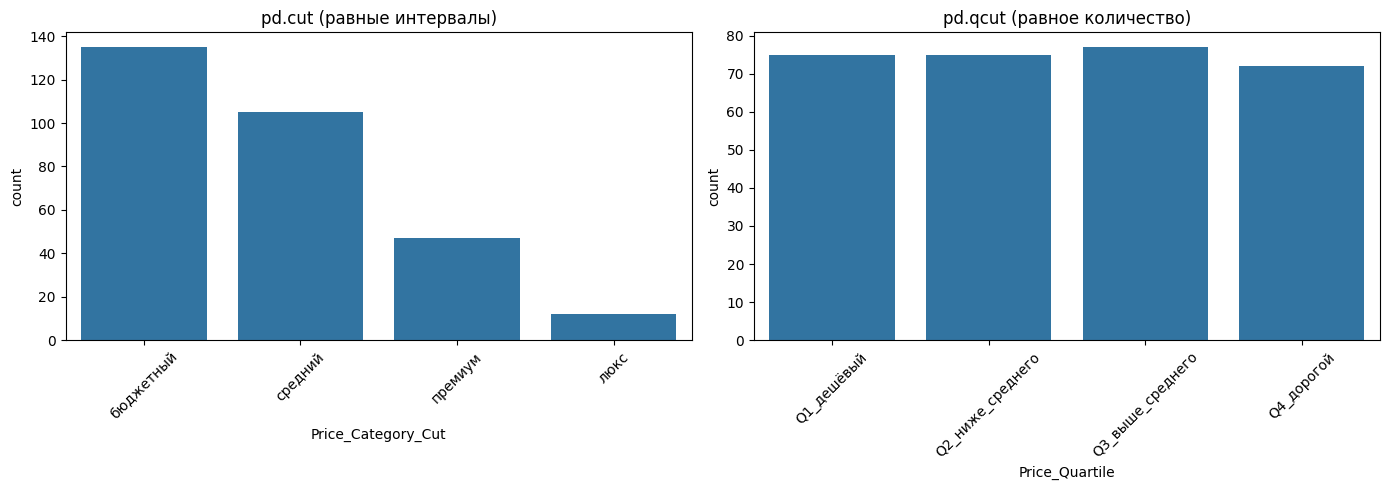

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x='Price_Category_Cut', ax=axes[0])
axes[0].set_title('pd.cut (равные интервалы)')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x='Price_Quartile', ax=axes[1])
axes[1].set_title('pd.qcut (равное количество)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [36]:
df['Is_Automatic'] = (df['Transmission'] == 'automatic').astype(int)

df['Is_First_Owner'] = (df['Owner'] == 0).astype(int)

df['Is_Diesel'] = (df['Fuel_Type'] == 'diesel').astype(int)

df[['Transmission', 'Is_Automatic', 'Owner', 'Is_First_Owner', 'Fuel_Type', 'Is_Diesel']].head()

,Transmission,Is_Automatic,Owner,Is_First_Owner,Fuel_Type,Is_Diesel
0,manual,0,0,1,petrol,0
1,manual,0,0,1,diesel,1
2,manual,0,0,1,petrol,0
3,manual,0,0,1,petrol,0
4,manual,0,0,1,diesel,1


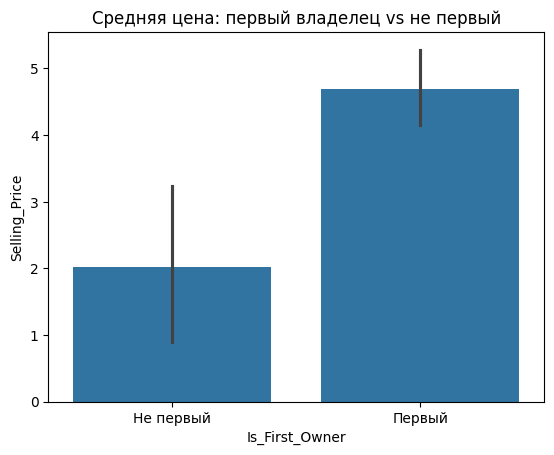

In [37]:
sns.barplot(data=df, x='Is_First_Owner', y='Selling_Price')
plt.title('Средняя цена: первый владелец vs не первый')
plt.xticks([0, 1], ['Не первый', 'Первый'])
plt.show()

In [38]:
df['Price_Drop'] = df['Present_Price'] - df['Selling_Price']
df['Price_Drop_Percent'] = (df['Price_Drop'] / df['Present_Price']) * 100

df[['Car_Name', 'Present_Price', 'Selling_Price', 'Price_Drop', 'Price_Drop_Percent']].head()

,Car_Name,Present_Price,Selling_Price,Price_Drop,Price_Drop_Percent
0,ritz,5.59,3.35,2.24,40.071556
1,sx4,9.54,4.75,4.79,50.209644
2,ciaz,9.85,7.25,2.60,26.395939
3,wagon r,4.15,2.85,1.30,31.325301
4,swift,6.87,4.60,2.27,33.042213


In [39]:
df.groupby('Fuel_Type')['Price_Drop_Percent'].mean()

Fuel_Type
cng       49.017809
diesel    32.225727
petrol    37.611815
Name: Price_Drop_Percent, dtype: float64

In [40]:
print("До Min-Max:")
print(f"Min: {df['Selling_Price'].min()}, Max: {df['Selling_Price'].max()}")

До Min-Max:
Min: 0.1, Max: 35.0


# 7. Масштабирование данных

In [41]:
minmax_scaler = MinMaxScaler()
df['Selling_Price_MinMax'] = minmax_scaler.fit_transform(df[['Selling_Price']])

print("После Min-Max:")
print(f"Min: {df['Selling_Price_MinMax'].min():.4f}, Max: {df['Selling_Price_MinMax'].max():.4f}")

После Min-Max:
Min: 0.0000, Max: 1.0000


In [42]:
std_scaler = StandardScaler()
df['Selling_Price_Std'] = std_scaler.fit_transform(df[['Selling_Price']])

print("После Standard Scaling:")
print(f"Mean: {df['Selling_Price_Std'].mean():.6f}")
print(f"Std: {df['Selling_Price_Std'].std():.6f}")

После Standard Scaling:
Mean: -0.000000
Std: 1.001676


In [43]:
robust_scaler = RobustScaler()
df['Selling_Price_Robust'] = robust_scaler.fit_transform(df[['Selling_Price']])

print("После Robust Scaling:")
print(f"Median: {df['Selling_Price_Robust'].median():.6f}")

После Robust Scaling:
Median: 0.000000


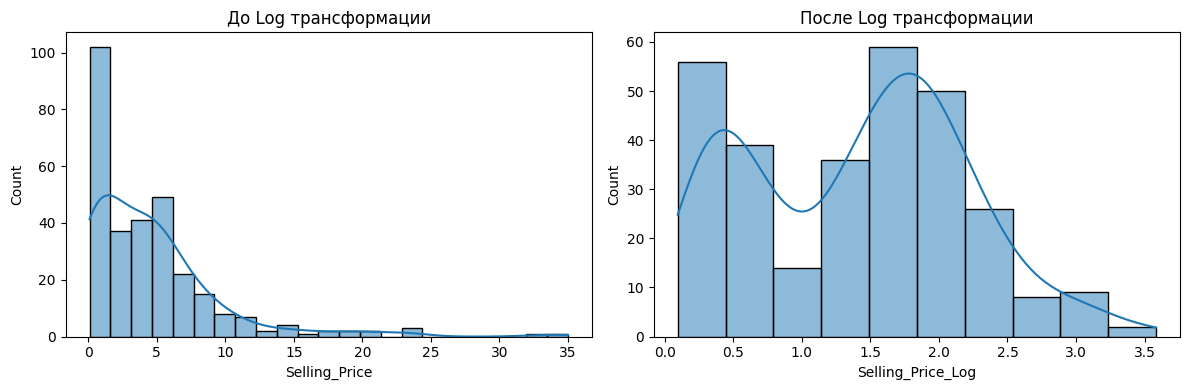

In [44]:
df['Selling_Price_Log'] = np.log1p(df['Selling_Price'])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Selling_Price'], kde=True, ax=axes[0])
axes[0].set_title('До Log трансформации')

sns.histplot(df['Selling_Price_Log'], kde=True, ax=axes[1])
axes[1].set_title('После Log трансформации')

plt.tight_layout()
plt.show()

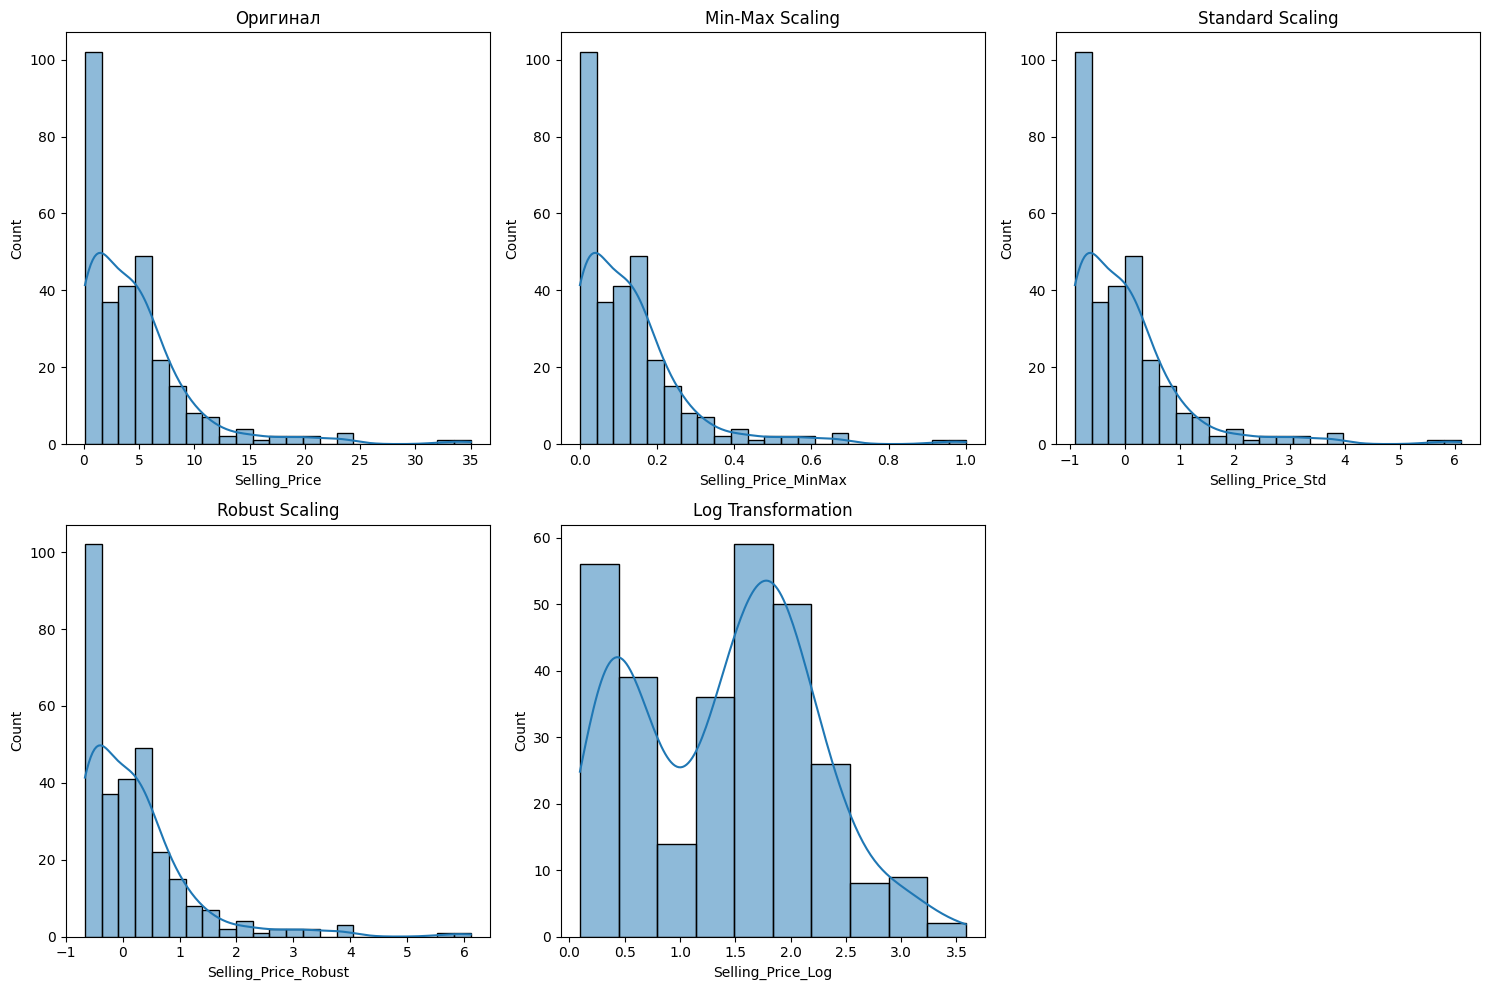

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Оригинал
sns.histplot(df['Selling_Price'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Оригинал')

# Min-Max
sns.histplot(df['Selling_Price_MinMax'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Min-Max Scaling')

# Standard
sns.histplot(df['Selling_Price_Std'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Standard Scaling')

# Robust
sns.histplot(df['Selling_Price_Robust'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Robust Scaling')

# Log
sns.histplot(df['Selling_Price_Log'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Log Transformation')

# Пустой график для баланса
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df["Selling_Price"] <

In [46]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Age,...,Price_Quartile,Is_Automatic,Is_First_Owner,Is_Diesel,Price_Drop,Price_Drop_Percent,Selling_Price_MinMax,Selling_Price_Std,Selling_Price_Robust,Selling_Price_Log
0,ritz,2014,3.35,5.59,27000,petrol,dealer,manual,0,11,...,Q2_ниже_среднего,0,1,0,2.24,40.071556,0.093123,-0.249127,-0.031068,1.470176
1,sx4,2013,4.75,9.54,43000,diesel,dealer,manual,0,12,...,Q3_выше_среднего,0,1,1,4.79,50.209644,0.133238,0.032229,0.240777,1.749200
2,ciaz,2017,7.25,9.85,6900,petrol,dealer,manual,0,8,...,Q4_дорогой,0,1,0,2.60,26.395939,0.204871,0.534651,0.726214,2.110213
3,wagon r,2011,2.85,4.15,5200,petrol,dealer,manual,0,14,...,Q2_ниже_среднего,0,1,0,1.30,31.325301,0.078797,-0.349612,-0.128155,1.348073
4,swift,2014,4.60,6.87,42450,diesel,dealer,manual,0,11,...,Q3_выше_среднего,0,1,1,2.27,33.042213,0.128940,0.002084,0.211650,1.722767


# 8. Итоговый DataFrame

In [47]:
print("Все признаки:")
df.columns.tolist()

Все признаки:


['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Driven_kms',
 'Fuel_Type',
 'Selling_type',
 'Transmission',
 'Owner',
 'Car_Age',
 'Km_per_Year',
 'Price_Category_Cut',
 'Price_Quartile',
 'Is_Automatic',
 'Is_First_Owner',
 'Is_Diesel',
 'Price_Drop',
 'Price_Drop_Percent',
 'Selling_Price_MinMax',
 'Selling_Price_Std',
 'Selling_Price_Robust',
 'Selling_Price_Log']

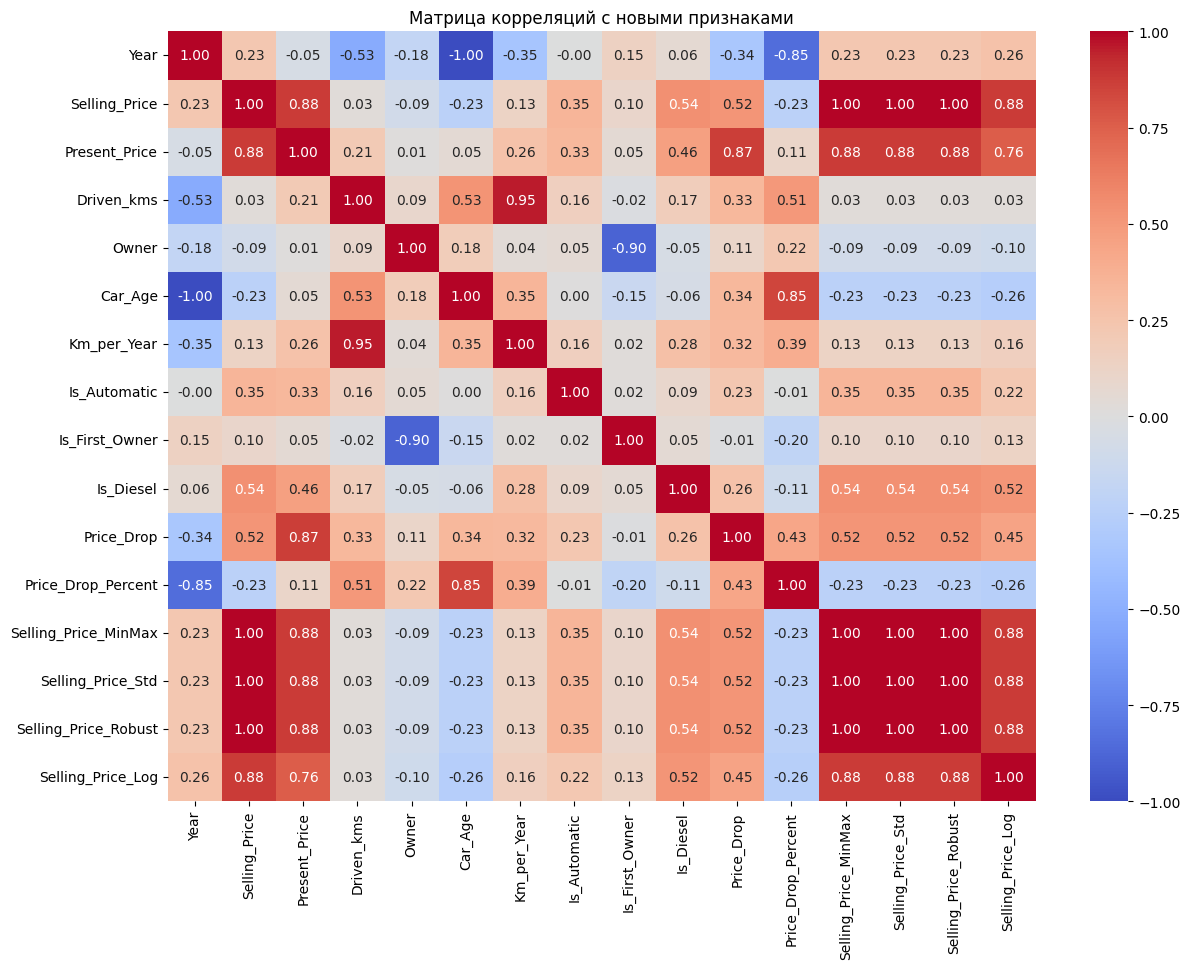

In [48]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций с новыми признаками')
plt.show()

# Задание для самостоятельной работы

1. Выбрать **новый датасет** на Kaggle 
2. Пройти полный пайплайн анализа:
   - Изучение и очистка данных
   - Построить минимум **4 графика** разных типов
   - Рассчитать корреляции
   - Создать **2+ новых признака**
   - Применить **2 метода масштабирования**
3. Написать **5-8 предложений** с выводами:
   - Какие инсайты нашли?
   - Какие корреляции обнаружили?
   - Какие признаки создали и зачем?
   - Какой метод масштабирования лучше подходит для ваших данных?